# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from IPython.display import display
data = pd.read_csv('/data/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Согласно документации к данным:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Некорректный тип данных обнаружен в колонках:
- first_day_exposition (дата публикации) - тип object - заменить на datetime 
- floors_total (всего этажей в доме) - float64 - заменить на int64
- is_apartment (апартаменты (булев тип)) - object - заменить на bool
- balcony (число балконов) - float64 - заменить на int64
- parks_around3000 (число парков в радиусе 3 км) - float64 - заменить на int6
- ponds_around3000 ( число водоёмов в радиусе 3 км) - float64 - заменить на int6

#### Обнаружены расхождения с хорошим стилем в названиях столбцов, нужно привести все столбцы к единому стилю:
    
- cityCenters_nearest
- parks_around3000
- ponds_around3000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

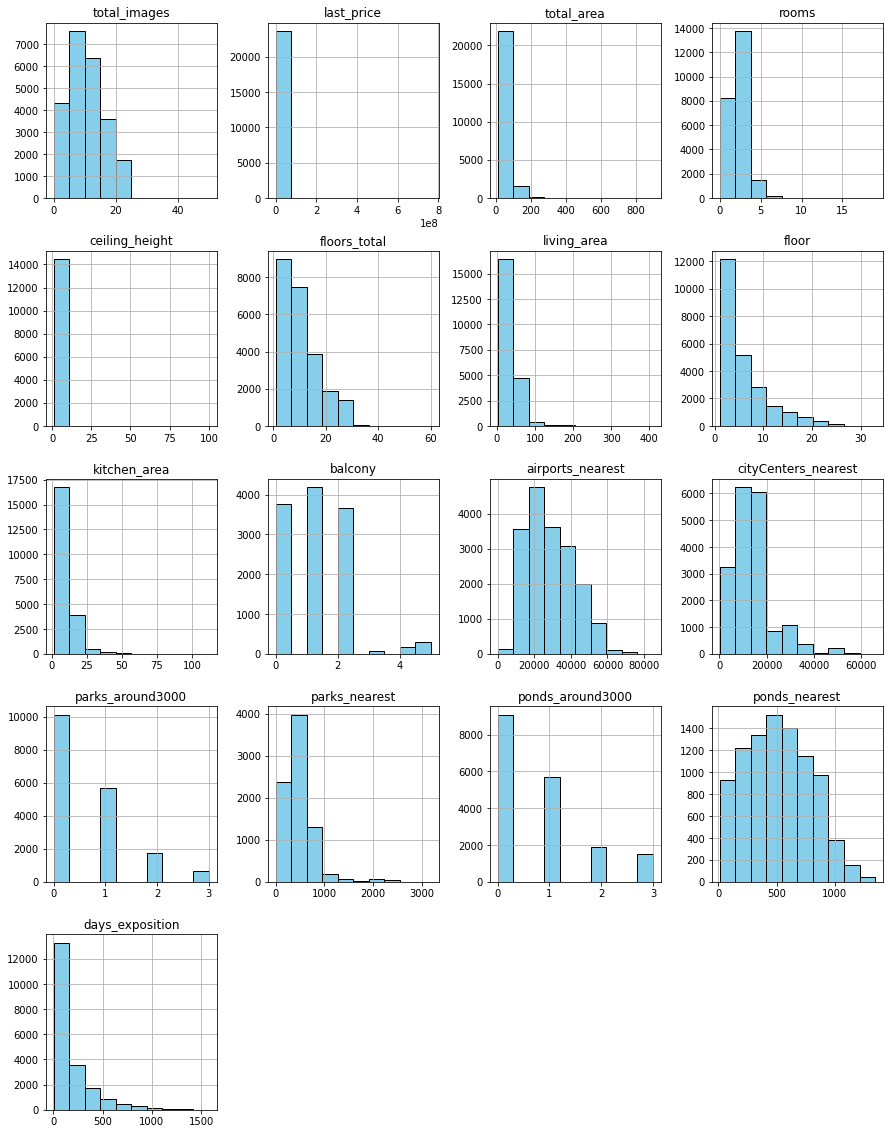

In [3]:
data.hist(figsize=(15, 20), edgecolor='black',  color='SkyBlue')

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Есть аномальные значения в столбцах:
- last_price (12190р) - аномально низкое значение - вероятно ошибка или указали в цену в другой валюте - например в долларах
- total_area (900) - не может быть квартира площадью 900 кв м
- rooms (0,19) - нулевые проверим, вероятно это студии так обозначили, 19 комнат вероятно ошибка, проверим на выбросы
- ceiling_height (1, 100) - по СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м
- floors_total (60) - нужно проверить, самое высокое здание в СПБ -86 этажей, возможно этот выброс будет мешать исследованию 
- living_area (2) - апартаменты на ЦИАН минимум 6,5 м кв, нужно проверить нормативы, т к апартаменты и квартиры это разный статус недвижимости, вероятно на квартиры есть минимальные нормативные значения 
- kitchen_area (1.3, 112) - минимум 5 м кв, по СП 54.13330.2011 Здания жилые многоквартир-ные. Актуализированная редакция СНиП 31-01-2003
- airports_nearest (0) - 0 - невозможно, хотя рядом с аэропортом присутствуют жилые здания - минимум 200 -300 м расстояние есть
- days_exposition (1580) - объявление висело больше 4 лет, сроки публикации объявления максимум 90 дней, т е объявление обновляли больше 4 лет - выглядит неправдоподобно( https://yandex.ru/support/realty/owner/home/add-ads-housing.html). В целом значения более 500 дней скорее всего выбросы- требуется проверка


#### Вывод ###
В таблице 23699 строк (каждая строка содержит данные по одной квартире), 22 столбца, с различным типом данных.
В нескольких колонках обнаружен некорректный тип данных, также есть расхождения с хорошим стилем в названиях столбцов, нужно привести все столбцы к единому стилю. Присутствуют аномальные значения, в 14 столбцах есть пропуски в данных, прежде чем анализировать данные нужно устранить проблемы в данных.

### Предобработка данных

#### Приведем названия в соответствие с хорошим стилем:

In [5]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 
                            'parks_around3000' : 'parks_around_3000', 
                            'ponds_around3000' : 'ponds_around_3000'})

#### Обработаем пропуски, аномальные значения и скорретируем тип данных в некоторых колонках

In [6]:
data.duplicated().sum() #- дубликаты не обнаружены

0

In [7]:
data.isna().sum() #оценим количество пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ceiling_height- высота потолков по стандартам от 2.5-2.8 м, значит для заполнения пропусков подходит медиана - 2.65
сначала уберем аномальные значения: 100. остались ошибочные данные 27, 32 и т д  - очевидно не проставлены запятые, поделим такие значения на 10. Проверим итог, осталась аномалия -14 -удалим, (до 10.3м допустимо в пентхаусах)

In [8]:
data = data[(data['ceiling_height'] != 100)]
display(data.sort_values('ceiling_height', ascending=False ).head(10))
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
display(data.sort_values('ceiling_height', ascending=False ).head())
data = data[(data['ceiling_height'] != 14)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


Посмотрим теперь распределение - выглядит правдоподобно, заполним пропуски медианным значением, проверим не осталось ли пропусков

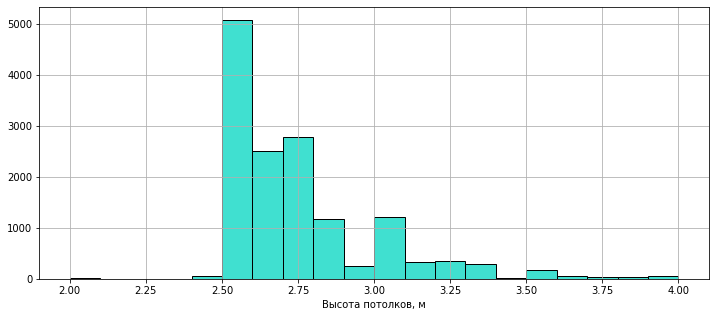

Пропуски в столбце 'ceiling_height': 0


In [9]:
data['ceiling_height'].hist(bins=20, grid=True, range=(2,4), figsize=(12,5), edgecolor='black',  color='turquoise')
plt.xlabel('Высота потолков, м')
plt.show() 
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
print("Пропуски в столбце 'ceiling_height':", data['ceiling_height'].isna().sum())

In [10]:
#floors_total, locality_name - совсем маленькое количество пропусков, на исследование не повлияют - удаляем эти строки
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int) #и сразу поменяем тип данных

living_area - 8% пропусков, основная масса объявлений по значению между 18.6 и 42.3, можно заменить пропуски медианой,
но лучше проверить корреляцию с общей площадью, т к должна быть определенная зависимость, если корреляция будет от 70% - можно эти данные использовать и расчитать средние показания, только сначала удалить аномальные значения (для total_area - 900 и для living_area будем считать от 6 м кв)

In [11]:
print('Корреляция жилой площади к общей площади:', data['living_area'].corr(data['total_area']))
data = data[(data['total_area'] != 900) & (data['living_area'] > 6)]
mean_area = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna((mean_area * data['total_area']), inplace=True)
data.describe()

Корреляция жилой площади к общей площади: 0.9397686355473381


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,21690.000000,2.169000e+04,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,21690.000000,20897.000000,11609.000000,16785.000000,16806.000000,16807.000000,7462.000000,16807.000000,8354.000000,18714.000000
mean,10.029046,6.478330e+06,60.026154,2.071323,2.698735,10.646611,34.448462,5.875426,10.503976,1.153932,28774.834674,14242.373319,0.610519,488.105066,0.764265,519.463131,184.768729
std,5.676470,1.051112e+07,34.226726,1.078390,0.240115,6.565720,21.895333,4.852537,5.800374,1.063941,12660.593734,8672.702224,0.801064,338.264835,0.936837,277.276931,221.415612
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,6.500000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18516.000000,9306.750000,0.000000,287.000000,0.000000,296.000000,44.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,26706.000000,13111.500000,0.000000,452.000000,0.000000,503.000000,101.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,2.000000,37242.000000,16268.000000,1.000000,610.000000,1.000000,731.000000,238.000000
max,50.000000,7.630000e+08,631.200000,19.000000,10.300000,60.000000,409.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


is_apartment - этот вид недвижимости появился относительно недавно, возможно поэтому много пропусков, заполним их и сразу поменяем тип данных

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)

kitchen_area,  2278 пропусков - прилично, посмотрим корреляцию с общей площадью: 
60% этого недостаточно чтобы расчитать по среднему, заполним пропуски медианой

In [13]:
print(data['kitchen_area'].corr(data['total_area']))
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

0.602266868733781


balcony - 11519 много пропусков, но здесь в большинстве случаев просто не заполняли данные если балкона нет,
заполним нулями и сразу поменяем тип данных

In [14]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

last_price - меняем тип данных, проверим аномалии - удалим, выведем отсортированый список - проверим

In [15]:
data['last_price'] = data['last_price'].astype(int)
display(data.sort_values('last_price').head())
data = data[data['last_price'] != 12190]
data.sort_values('last_price').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000,30.4,2019-04-22T00:00:00,1,2.65,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9581,7,450000,43.4,2018-08-31T00:00:00,2,2.65,5,30.3,3,False,...,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000,42.0,2017-07-31T00:00:00,2,2.65,1,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
17676,0,450000,36.5,2018-02-01T00:00:00,1,2.65,5,17.3,4,False,...,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17456,7,430000,30.4,2019-04-22T00:00:00,1,2.65,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9581,7,450000,43.4,2018-08-31T00:00:00,2,2.65,5,30.3,3,False,...,5.5,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000,42.0,2017-07-31T00:00:00,2,2.65,1,23.0,1,False,...,5.8,0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
17676,0,450000,36.5,2018-02-01T00:00:00,1,2.65,5,17.3,4,False,...,8.5,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
18867,1,470000,41.0,2018-02-11T00:00:00,1,2.65,5,32.0,3,False,...,9.0,0,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


Приведем first_day_expozition к формату datetime

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим заполняемость пропусков

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4905
city_centers_nearest     4884
parks_around_3000        4883
parks_nearest           14228
ponds_around_3000        4883
ponds_nearest           13335
days_exposition          2976
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21689 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21689 non-null  int64         
 1   last_price            21689 non-null  int64         
 2   total_area            21689 non-null  float64       
 3   first_day_exposition  21689 non-null  datetime64[ns]
 4   rooms                 21689 non-null  int64         
 5   ceiling_height        21689 non-null  float64       
 6   floors_total          21689 non-null  int64         
 7   living_area           21689 non-null  float64       
 8   floor                 21689 non-null  int64         
 9   is_apartment          21689 non-null  bool          
 10  studio                21689 non-null  bool          
 11  open_plan             21689 non-null  bool          
 12  kitchen_area          21689 non-null  float64       
 13  balcony         

Оценим выбросы в 'rooms'

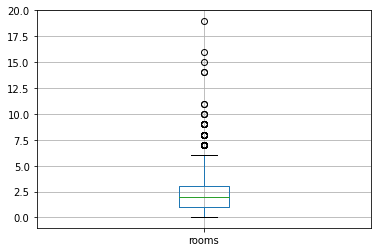

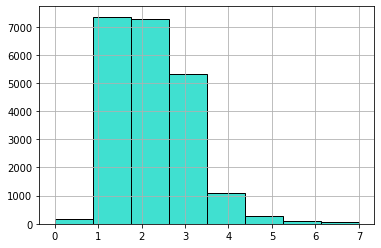

In [19]:
plt.ylim(-1, 20)
data.boxplot('rooms')
plt.show()
data['rooms'].hist(bins=8, range=(0,7), edgecolor='black', color='turquoise')
plt.show()

Все значения более 10 комнат можем считать выбросами - удаляем, значения 0 нужно проверить - возможно так обозначили студии

In [20]:
data = data[data['rooms'] < 10]
display(data.query('(rooms == 0) & (not studio)').count())
display(data.query('(rooms == 0) & (not studio)').head(10))

total_images            55
last_price              55
total_area              55
first_day_exposition    55
rooms                   55
ceiling_height          55
floors_total            55
living_area             55
floor                   55
is_apartment            55
studio                  55
open_plan               55
kitchen_area            55
balcony                 55
locality_name           55
airports_nearest        28
city_centers_nearest    28
parks_around_3000       28
parks_nearest            8
ponds_around_3000       28
ponds_nearest           18
days_exposition         55
dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
349,4,2320000,25.00,2017-09-27,0,2.65,14,17.0,1,False,...,9.0,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000,34.40,2017-03-28,0,2.65,26,24.3,19,False,...,9.0,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
839,14,1900000,35.00,2017-04-14,0,2.70,5,15.0,3,False,...,9.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23.00,2016-09-27,0,2.65,27,18.0,7,False,...,9.0,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000,22.00,2017-11-03,0,2.65,18,15.0,16,False,...,9.0,1,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000,23.98,2018-02-01,0,2.65,4,10.5,3,False,...,9.0,1,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000,27.10,2018-02-01,0,2.65,18,18.7,9,False,...,9.0,2,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000,24.00,2017-11-10,0,2.65,10,18.0,6,False,...,9.0,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000,24.00,2018-02-01,0,2.65,25,18.0,4,False,...,9.0,2,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0
4437,10,3200000,25.00,2017-10-16,0,2.65,9,18.6,9,False,...,9.0,2,Санкт-Петербург,11943.0,11710.0,1.0,518.0,1.0,232.0,97.0


Всего таких 55 значений, по соотношению к площади становится понятно, что это студии - заменим в этих данных значение в колонке 'studio' на True, исправим количество комнат в них на 1, проверим остались ли нулевые значения

In [21]:
data.loc[data['rooms'] == 0, 'studio'] = True 
data.loc[data['rooms'] == 0, 'rooms'] = 1 
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Заменим дублирующиеся значения, для этого сначала выведем все уникальные значения локаций

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

Приведем все записи 'посёлок', 'поселок' к единому виду- 'поселок'

In [23]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Советский',
       'городской поселок Фёдоровское', 'городской поселок Ян

Теперь приведем к единому виду все городские поселки и поселки станции, 
остальные возможные дубликаты трогать не будем, т к неизвестно точно дубль это или другой тип поселения - 
например Никольское может быть и село и деревня, а это разные объекты,
(выборочно проверила - деревня Кудрово и Кудрово(город)), на исследование это сильно не повлияет

In [24]:
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Выскатка', 'деревня Гарболово', 

In [25]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок станции ', '', regex=True)
data['locality_name'] = data['locality_name'].replace('коттеджный поселок ', '', regex=True) 
data['locality_name'] = data['locality_name'].replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].replace('деревня ', '', regex=True)
data['locality_name'] = data['locality_name'].replace('село', '', regex=True)
data['locality_name'] = data['locality_name'].replace('садовое товарищество ','', regex=True)
data['locality_name'] = data['locality_name'].replace('садоводческое некоммерческое товарищество ', '', regex=True)                                  
data['locality_name'] = data['locality_name'].str.lstrip()
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Калит

#### Вывод по предобработке данных:
 **Пропуски выявлены в столбцах:**
- ceiling_height (39% пропусков) - очень много не заполненых показателей высоты потолков, и еще обнаружена часть внесенных ошибочно данных - 28 м вместо 2.8, данные скорректированы, удалены несколько анамальных значений, пропуски заполнены медианным значением. Рекомендуется передать задачу разработчикам по оптимизации шаблона для ввода данных (сделать ячейку обязательной для ввода, скорректировать формат, например ограничить вввод до 12 м, т к бывают единичные случаи с очень высокими потолками)
- floors_total (0,3% ) и locality_name (0,2%) - незначительные пропуски, удалим, вероятно не вносили этажность на дома с 1 этажем, локация возможно внесена некорректно поэтому при выгрузке не отобразилась
- living_area (8%) - возможно владельцы при внесении данных не знали этот показатель, поэтому не внесли, проверили корреляцию с общей площадью, выявили 94% - сформировали пропуски на основе этих данных со средним значением
- is_apartment (88%) - тип недвижимости "аппартаметы" появился не так давно, возможно многие не знают в чем разница и не заполняют этот параметр, следует обратить внимание разработчикам, скорректировать шаблон, пропуски заполнили значением False
- kitchen_area (9%) - корреляция с общей площадью не показательна - 60%, поэтому заполнили медианным значением
- balcony (48%) - очевидно что просто не заполняют значение если балкона нет - заполнили "0"
- airports_nearest (23%) - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- city_centers_nearest (23%) - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- parks_around_3000 (23%) - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- parks_nearest (65%) - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- ponds_around_3000 (23%)  - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- ponds_nearest (61%) - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить
- days_exposition (13%) - самое странное отклонение - эти данные должны быть сформированы корректно в любом случае, т к задействован внутренний счетчик - вопрос переадресуем ответственным. Все пропущенные значения можно было бы заменить на медиану, но в таком случае получим искажения по пиковым значениям - пик будет 110 вместо логичных 90 дней (стандартные сроки публикации 45-60-90 дней, чему соответствуют пиковые значения), поэтому заполнять пропуски не будем. Выбросы (значения более 600) при исследовании исключим.

**Аномальные значения**

Все аномальные значения устранены,
в данных осталось 21679 строк, 9% данных были удалены, в основном это были некорректные данные с указанием жилой площади - менее 6 м кв - по ним исследование было бы не правдоподобно


**Дубликаты**

Были обнаружены дублирующиеся наименования населенных пунктов, преобразовали к единому виду без типов поселений, это допустимо в этом случае, т к работаем с выборкой по одной области, если и будут совпадения по разным типам поселений, то незначительные - на исследовании это значительно не отобразится

### Посчитайте и добавьте в таблицу новые столбцы

#### Создадим столбец с расчетом стоимости одного квадратного метра:  "single _square_meter"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,single_square_meter
4405,9,500000,52.0,2018-08-02,2,2.70,2,31.0,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,110.0,9615
11351,17,550000,54.0,2019-02-07,2,3.00,2,40.0,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,78.0,10185
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.3,3,False,...,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,10368
23477,3,1450000,138.0,2018-07-06,3,2.65,2,58.0,2,False,...,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,52.0,10507
23484,11,470000,44.5,2018-07-02,2,2.65,2,28.0,2,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0,10561
5698,7,450000,42.0,2017-07-31,2,2.65,1,23.0,1,False,...,0,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,10714
19460,13,560000,52.0,2017-11-21,2,3.00,3,30.0,3,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,207.0,10769
9471,4,850000,78.0,2017-05-04,3,2.65,9,12.5,7,False,...,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,169.0,10897
15969,8,590000,54.0,2018-06-20,2,2.65,2,32.0,1,False,...,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10925
16444,15,990000,88.0,2019-04-08,3,2.65,1,40.0,1,False,...,0,Оредеж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11250


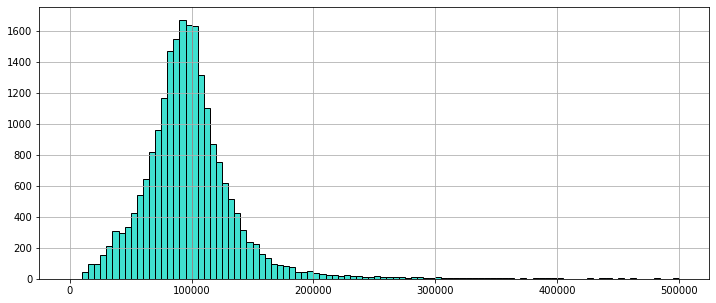

In [27]:
data['single_square_meter'] = (data['last_price'] / data['total_area']).astype(int)
data['single_square_meter'].hist(bins=100, range=(0,500000), figsize=(12,5), edgecolor='black', color='turquoise', grid=True)
data.sort_values(by='single_square_meter').head(10)

Присутствуют странно низкие значения - менее 10000 за кв м. посмотрели их в таблице - относительно правдопадобно, пока оставим так

#### Создадим столбцы и распределим данные по группам публикации объявлений
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;

In [28]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,single_square_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018


#### Сгруппируем данные по типу этажа квартиры (значения — «первый», «последний», «другой»)

Создадим столбец 'floors_category' в котором сгруппируем значения по типу этажа через функцию:

In [29]:

def floors_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floors_category, axis=1) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,single_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой


#### Сформируем расстояние до центра города в километрах

In [30]:
data['city_centers_distance'] = round(data['city_centers_nearest']/1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,single_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN


Данные к анализу готовы, необходимые столбцы и расчеты сформированы, можно начинать исследование.

### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков

Для удобства выведем необходимые значения квартили, min, max

In [31]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,single_square_meter,weekday_exposition,month_exposition,year_exposition,city_centers_distance
count,21679.000000,2.167900e+04,21679.000000,21679.000000,21679.000000,21679.000000,21679.000000,21679.000000,21679.000000,21679.000000,...,16796.000000,7454.000000,16796.000000,8348.000000,18705.000000,2.167900e+04,21679.000000,21679.000000,21679.000000,16795.000000
mean,10.030352,6.467390e+06,59.913223,2.074634,2.698521,10.648369,34.371827,5.875456,10.439651,0.617787,...,0.610205,488.066810,0.764170,519.605894,184.701791,9.942904e+04,2.549103,6.423682,2017.352138,14.241798
std,5.676733,1.049676e+07,33.754738,1.038365,0.239886,6.565659,21.539841,4.851659,5.660983,0.968195,...,0.800826,338.376299,0.936853,277.277084,221.232485,4.926345e+04,1.781903,3.466175,1.046122,8.678377
min,0.000000,4.300000e+05,12.000000,1.000000,1.000000,1.000000,6.500000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,9.615000e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.095000,0.000000,...,0.000000,287.000000,0.000000,296.000000,44.000000,7.715600e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,451.500000,0.000000,503.000000,101.000000,9.509500e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.750000e+06,69.300000,3.000000,2.700000,16.000000,42.300000,8.000000,11.700000,1.000000,...,1.000000,610.000000,1.000000,732.000000,238.000000,1.139600e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,631.200000,9.000000,10.300000,60.000000,347.500000,33.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


##### Выведем графики общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков

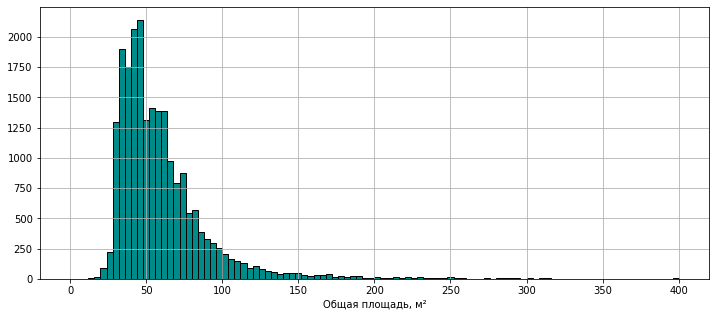

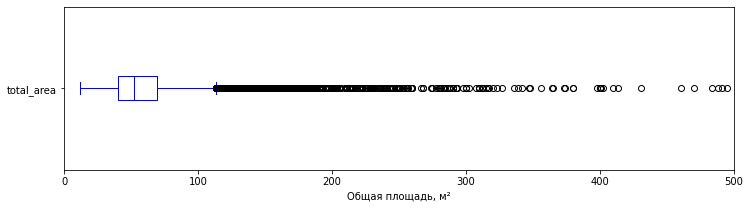

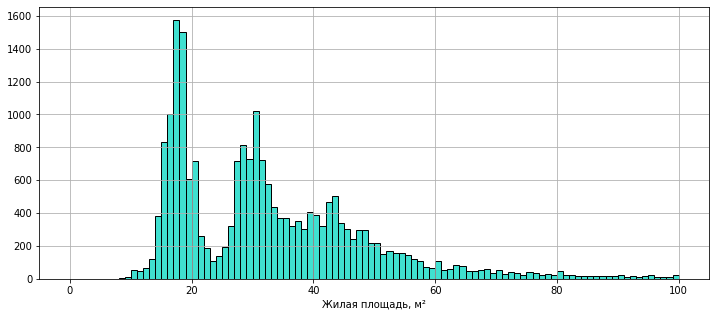

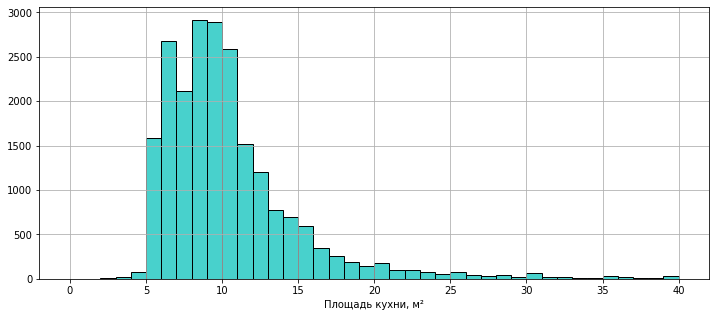

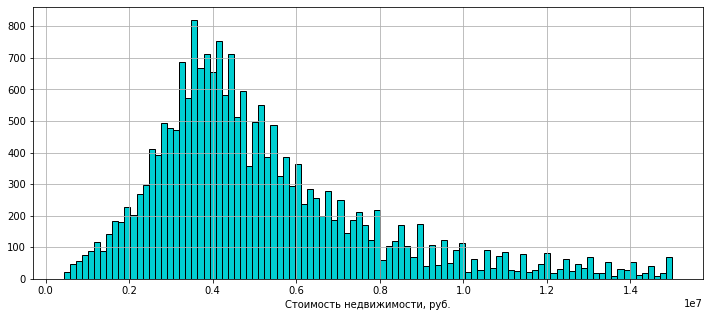

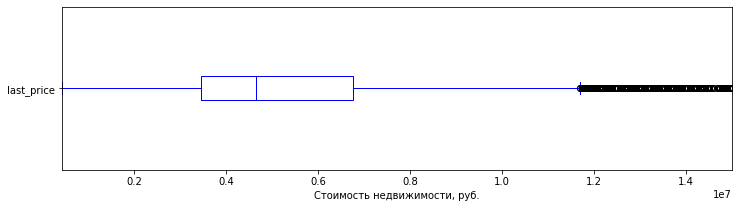

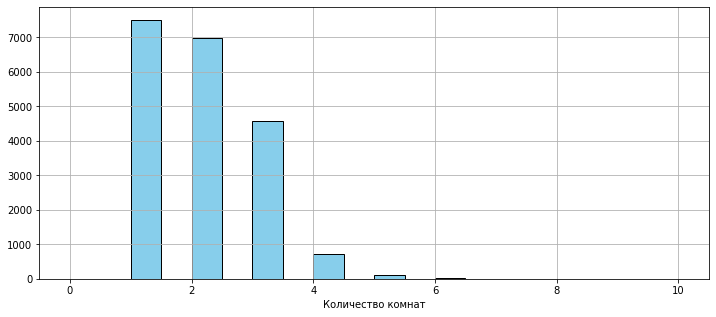

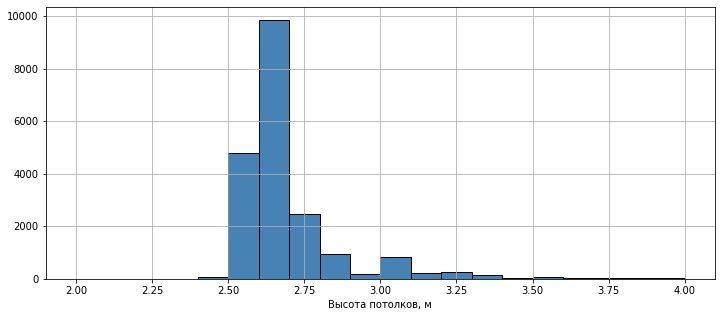

In [32]:
data['total_area'].hist(bins=100, range=(0,400), figsize=(12,5), edgecolor='black', color='DarkCyan')
plt.xlabel('Общая площадь, м²')
plt.show()
data.boxplot('total_area', grid=False, color ='blue', figsize=(12,3), vert=False )
plt.xlabel('Общая площадь, м²')
plt.xlim(0, 500)
plt.show()

data['living_area'].hist(bins=100, grid=True, range=(0,100), figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Жилая площадь, м²')
plt.show()

data['kitchen_area'].hist(bins=40, grid=True, range=(0,40), figsize=(12,5), edgecolor='black', color='MediumTurquoise')
plt.xlabel('Площадь кухни, м²')
plt.show()

data['last_price'].hist(bins=100, grid=True,  range=(430000,15000000), figsize=(12,5), edgecolor='black', color='DarkTurquoise')
plt.xlabel('Стоимость недвижимости, руб.')
plt.show()
data.boxplot('last_price', grid=False, color ='blue', figsize=(12,3), vert=False )
plt.xlabel('Стоимость недвижимости, руб.')
plt.xlim(430000,15000000)
plt.show()
#по графикам видно что выбросы значительные - сильно повлияют на исследование, уберем их из данных
data = data[data['last_price'] < 12000000] 

data['rooms'].hist(bins=20, grid=True, range=(0,10), figsize=(12,5), edgecolor='black', color='SkyBlue')
plt.xlabel('Количество комнат')
plt.show()

data['ceiling_height'].hist(bins=20, grid=True, range=(2,4), figsize=(12,5), edgecolor='black', color='SteelBlue')
plt.xlabel('Высота потолков, м')
plt.show()

##### По графикам можно сделать следущие выводы:
1. Данные по общей площади распределяются по Пуассону, достаточно много выбросов - объектов свыше 280м², максимум -631м², минимум - 12 м². большинство объявлений на недвижимость 32м², 46м². Медианное значение - 59м². Редкие значения свыше 150м²
2. График по жилой площади показывает выраженые 3 пика - возможно это связано с большим спросом на 1 комнатные квартиры и квартиры-студии (у которых не указывают часто площадь кухни, соответственно учитывают в жилую или общую площадь), т к первый пик приходится на область до 21м². Второй пик до 35м², редко более 60м², но эти значения есть и растягиваюся до единичных случаев в 347м². Медианное значение 30м²
3. Площадь кухни чаще встечается 6-10м² и реже до единичных значений максимум 107м². Медианное значение 9 кв м
4. По стоимости очень большой разброс от 430 тысяч до 763 миллионов, в этом случае медианное  значение  4 650 000 - лучше отражает действительность, чем среднее значение. Все что свыше 12 миллионов можно считать выбросами, удалили эти данные из выборки, т к они будут сильно влиять на итоги исследования
5. Количество комнат по популярности в порядке убывания - 1-2-3, достаточно типично.
6. Выстора потолков в основном стандартная - от 2,5-2,8 м. чаще всего 2,6 м - что соответствует нормам СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные»
7. В целом по всем предствленным показателям есть отклонения в большие значения, что говорит о наличии небольшого количества элитной недвижимости большой площади с высокими потолками. Основная масса же недвижимости это 1-2 комнатные квартиры, площадью 32-59м², с кухней 6-10м² стоимостью 2 800 000-5 600 000 рублей


#### Изучим следующие параметры объектов: этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме

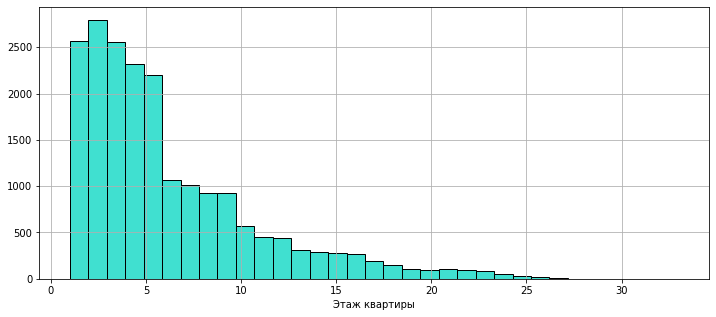

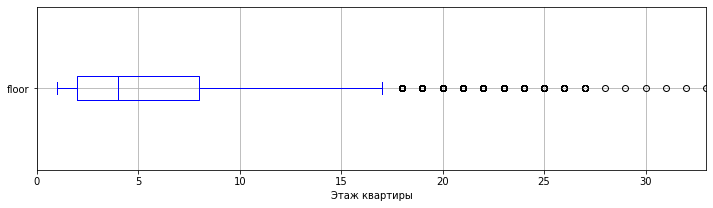

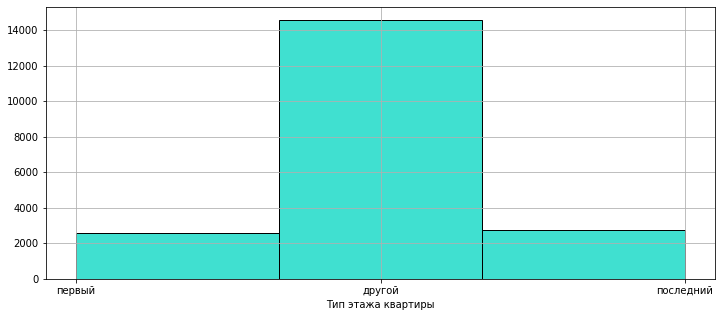

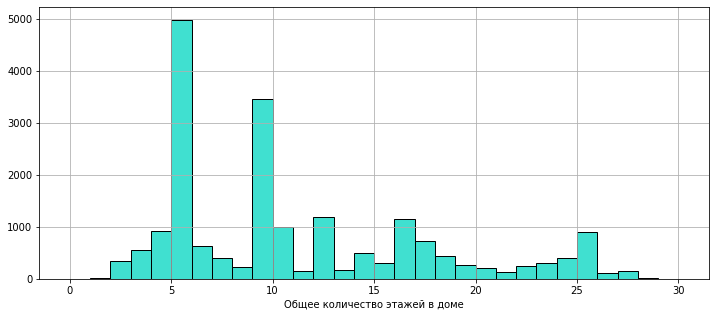

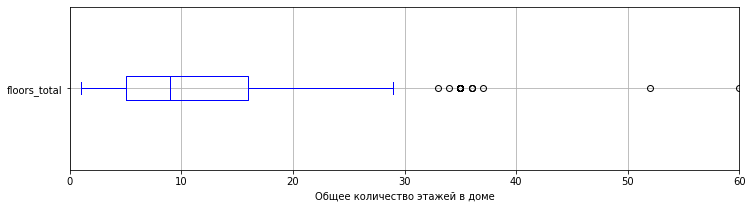

In [33]:
data['floor'].hist(bins=33, figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Этаж квартиры')
plt.show()
data.boxplot('floor', grid=True, color ='blue', figsize=(12,3), vert=False )
plt.xlabel('Этаж квартиры')
plt.xlim(0, 33)
plt.show()
data['floor_type'].hist(bins=3, figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Тип этажа квартиры')
plt.show()
data['floors_total'].hist(bins=30, range=(0,30), figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Общее количество этажей в доме')
plt.show()
data.boxplot('floors_total', grid=True, color ='blue', figsize=(12,3), vert=False)
plt.xlabel('Общее количество этажей в доме')
plt.xlim(0, 60)
plt.show()

##### По распределению недвижимости по этажам, вывод следующий:
В основном продаются квартиры в 5 и 9 этажных домах, с расположением в основном на "не первом и не последнем" этажах (чаще на 2-3 этажах, что логично - эти этажи есть в любом многоэтажном доме, а значит и вариантов больше всего).
Также встречаются 12, 16 этажные здания и реже другие, очень редко многоэтажные дома свыше 28 этажей, единичные случаи - 60 этажей, что правдопадобно, таких зданий в СПБ практически нет


#### Изучим следующие параметры объектов: расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка

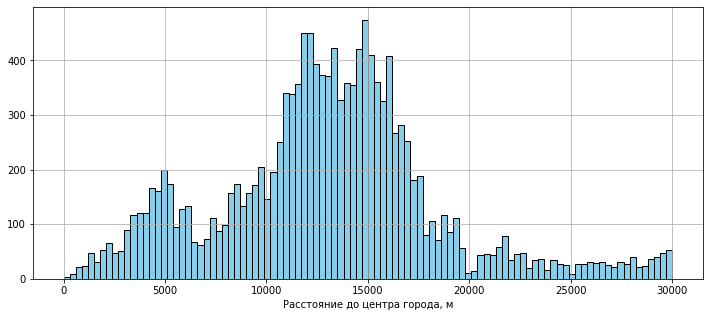

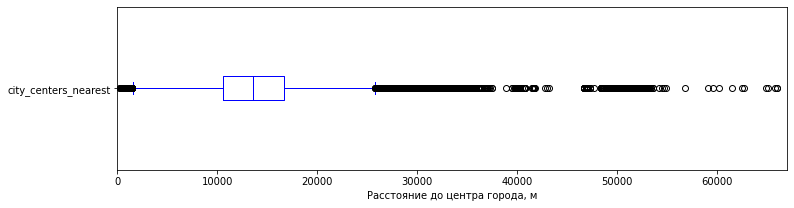

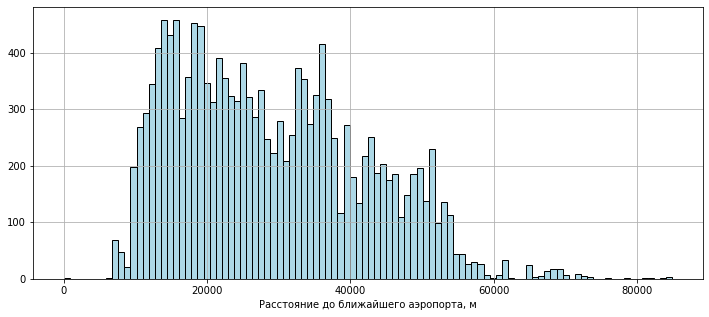

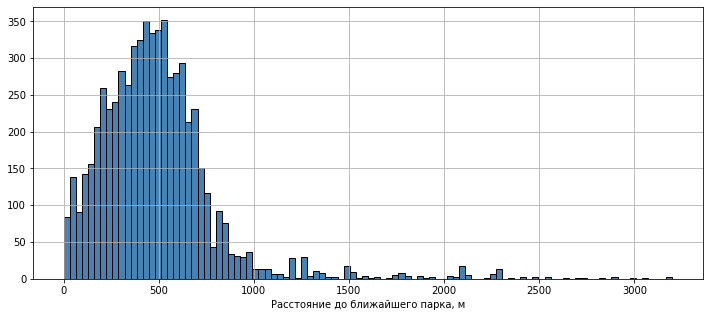

In [34]:
data['city_centers_nearest'].hist(bins=100, range=(0,30000), figsize=(12,5), edgecolor='black', color='SkyBlue')
plt.xlabel('Расстояние до центра города, м')
plt.show()
data.boxplot('city_centers_nearest', grid=False, color ='blue', figsize=(12,3), vert=False)
plt.xlabel('Расстояние до центра города, м')
plt.xlim(0, 67000)
plt.show()
data['airports_nearest'].hist(bins=100, figsize=(12,5), edgecolor='black', color='LightBlue')
plt.xlabel('Расстояние до ближайшего аэропорта, м')
plt.show()
data['parks_nearest'].hist(bins=100, range=(0,3200), figsize=(12,5), edgecolor='black', color='SteelBlue')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.show()

##### По распределению недвижимости по удаленности от центра города, аэропорта и парка, вывод следующий:
Основная масса объктов находится на расстоянии 11-17 км от центра города (видимо спальные районы), в 10-37 км от аэропорта и до 700 метров от ближайшего парка.


#### Изучим следующие параметры объектов: день и месяц публикации объявления

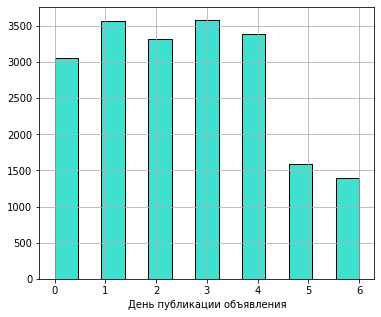

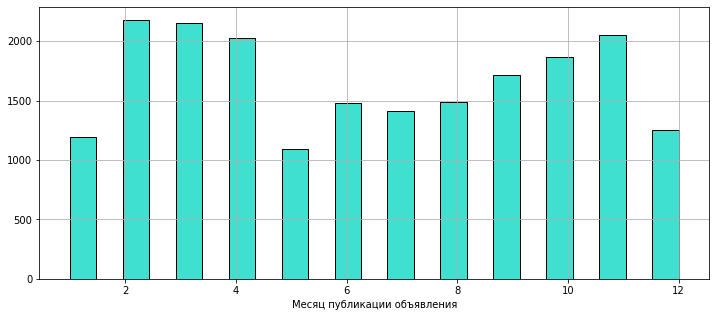

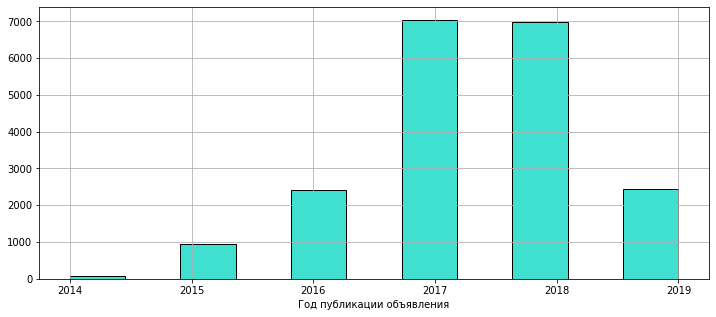

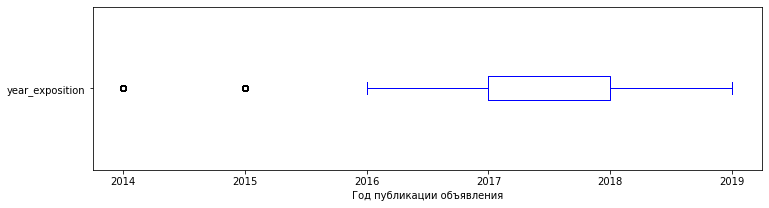

In [35]:
data['weekday_exposition'].hist(bins=13, figsize=(6,5), edgecolor='black', color='turquoise')
plt.xlabel('День публикации объявления')
plt.show()
data['month_exposition'].hist(bins=23, figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Месяц публикации объявления')
plt.show()
data['year_exposition'].hist(bins=11, figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Год публикации объявления')
plt.show()
data.boxplot('year_exposition', grid=False, color ='blue', figsize=(12,3), vert=False )
plt.xlabel('Год публикации объявления')
plt.show()

##### По распределению по датам публикации, вывод следующий:
1. Чаще всего публикуют объявления в буднии дни, что связано в большинстве с рабочей неделей риелторов, обычно к выходним назначают больше просмотров - тогда удобнее обычно и собственникам и потенциальным покупателям.
2. По месяцам меньше всего объявлений с мая по  август - видимо связано с отпусками, и в декабре - январе, что также связано с новогодними праздниками-каникулами
3. Меньше всего объявлений в 2014 году - связано, во-первых, с кризисом 2014-2015гг, во-вторых с вероятной непопулярностью сервиса - чаще использовали другие платформы для размещения объявлений, это можно проверить в другом исследовании с доп данными за ранние годы и рекламные компании.

#### Анализ скорости продажи квартир
Изучим - сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.

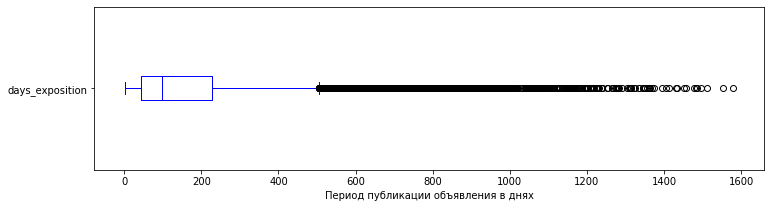

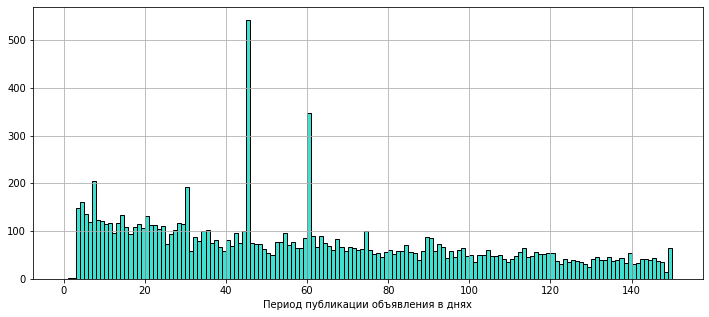

Период публикации объявления, медианное значение:  97 день
Период публикации объявления, среднее значение:  177 дней


In [36]:
data.boxplot('days_exposition', grid=False, color ='blue', figsize=(12,3), vert=False )
plt.xlabel('Период публикации объявления в днях')
#plt.xlim(0, 530)
plt.show()
data['days_exposition'].hist(bins=150, range=(0,150), figsize=(12,5), edgecolor='black', color='turquoise')
plt.xlabel('Период публикации объявления в днях')
plt.show()
print('Период публикации объявления, медианное значение: ', round(data['days_exposition'].median()), 'день')
print('Период публикации объявления, среднее значение: ', round(data['days_exposition'].mean()), 'дней')

В данном параметре мы хотим изучить время продажи недвижимости. Данные этого показателя искажены - мы не можем утверждать что период публикации объявления равен периоду продажи, т к человеческий фактор не исключает возможность того, что при продаже могут просто не снять объявление с публикации. Также в данных присутствуют 13% пропущенных значений которы мы не может заменить нулями, медианой или средним значением - это приведет к еще большему искажению данных. Cроки публикации объявления 45-60-максимум 90 дней (https://yandex.ru/support/realty/owner/home/add-ads-housing.html ). Значения более 500 дней - выбросы. 

Итого, основываясь на предоставленных данных, получаем: 
1. Чаще всего жилая недвижимость продается за 45 дней
2. Реже за 60 дней, затем  7 дней, 30 дней, и 90 дней
3. Быстрой можно считать продажу до 30 дней - и это самый точный показатель по данному параметру - объявление снимается вручную, хотя также будет некоторый процент снятых объявлений из-за ошибок, дублей или "передумали продавать"
4. Интересно что два пика приходится на 7 и 30 дней - это сроки публикации объявлений по длительной аренде, возможно есть процент ошибочных объявлений - размещенных в неправильной категории
5. Длительной продажей можно считать от значения 238 дней
6. Необычайно долгой можно считать продажу от 530 дней. Максимальное значение зафиксировано в 1580 дней (более 4 лет)


#### Анализ факторов, влияющих на стоимость недвижимости
 Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Выведем показания корреляции и сводный график по распределению общей, жилой и кухонной площади

Корреляция стоимости с общей площадью недвижимости: 70.8%
Корреляция стоимости с жилой площадью недвижимости: 58.6%
Корреляция стоимости с площадью кухни недвижимости: 48.4%


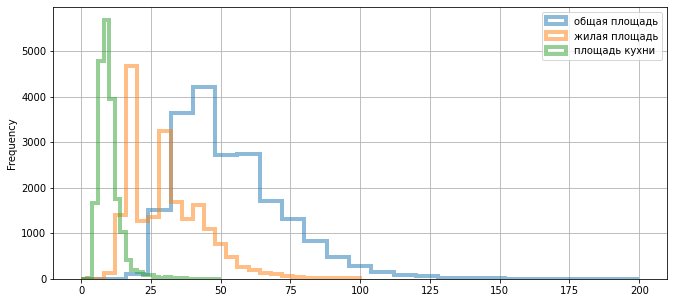

In [37]:
print('Корреляция стоимости с общей площадью недвижимости: {:.1%}'.format(data['last_price'].corr(data['total_area'])))
print('Корреляция стоимости с жилой площадью недвижимости: {:.1%}'.format(data['last_price'].corr(data['living_area'])))
print('Корреляция стоимости с площадью кухни недвижимости: {:.1%}'.format(data['last_price'].corr(data['kitchen_area'])))

ax=data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=25,
    linewidth=4,
    alpha=0.5,
    label='общая площадь',
    figsize=(11, 5),
    grid=True,
    legend=True,
) 
data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 100),
    bins=25,
    linewidth=4,
    ax=ax,
    alpha=0.5,
    label='жилая площадь',
)  
data.plot(
    kind='hist',
    y='kitchen_area',
    histtype='step',
    range=(0, 50),
    bins=25,
    linewidth=4,
    alpha=0.5,
    label='площадь кухни',
    ax=ax,
    grid=True,
    legend=True,
) 
plt.show()


##### Выведем гистограмму по стоимости недвижимости и диаграммы рассеивания по общей, жилой площади и площади кухни

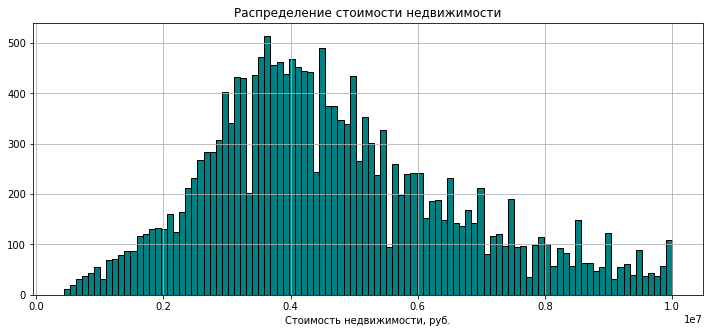

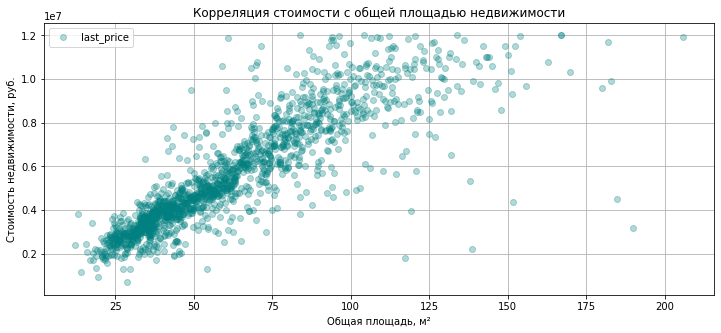

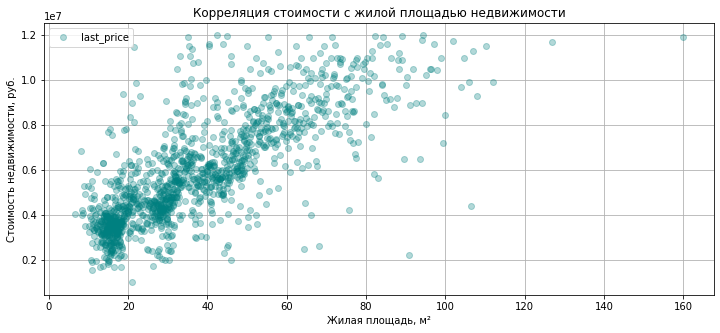

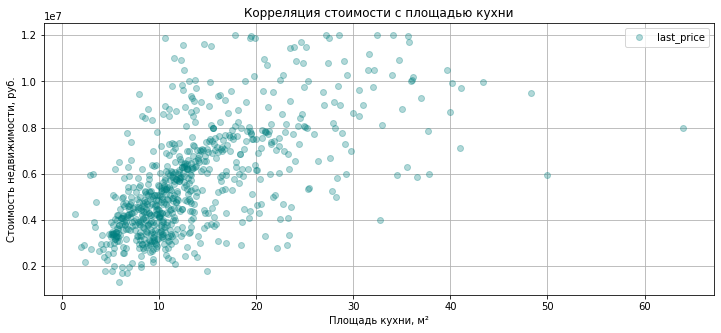

In [38]:
data['last_price'].hist(bins=100, grid=True,  range=(0.43e+6,1e+7), figsize=(12,5), edgecolor='black', color='Teal')
plt.title("Распределение стоимости недвижимости")
plt.xlabel('Стоимость недвижимости, руб.')
plt.show()


(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 5), color='Teal',  alpha=0.3)
)
plt.title("Корреляция стоимости с общей площадью недвижимости")
plt.xlabel("Общая площадь, м²")
plt.ylabel("Стоимость недвижимости, руб.")
plt.show()

(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 5), color='Teal',  alpha=0.3)
)
plt.title("Корреляция стоимости с жилой площадью недвижимости")
plt.xlabel("Жилая площадь, м²")
plt.ylabel("Стоимость недвижимости, руб.")
plt.show()

(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(12, 5), color='Teal',  alpha=0.3)
)
plt.title("Корреляция стоимости с площадью кухни")
plt.xlabel("Площадь кухни, м²")
plt.ylabel("Стоимость недвижимости, руб.")
plt.show()


##### Влияние общей площади, жилой площади и площади кухни на общую стоимость недвижимости
1. На графиках площадей и стоимости видим распределение по Пуассону, самая большой коэффициент корреляции (62,9%) стоимости с общей площадью - что логично, чем больше площадь недвижимости - тем выше стоимость квартиры.
2. Жилая площадь и площадь кухни влияют в меньшей степени на стоимость - это может быть связано с зависимостью ценообразования от удаленнности от центра, в спальных и новых районах возможно увеличение числа больших квартир за счет строительства новых жк, а кухни, в целом имеют в большинстве площадь до 20 кв м в соответствии со своим назначением, т к у нас нет данных по годам постройки зданий, нет возможности это исследовать
3. Присутствуют единичные аномалии с высокой стоимостью и большой площадью, а также наоборот - с очень низкой стоимостью, возможно это недвижимость в нелеквидном состоянии или в отдаленных локациях


##### Сформируем графики чтобы оценить влияние количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год), на общую стоимость недвижимости

Корреляция стоимости с количеством комнат: 46.4%


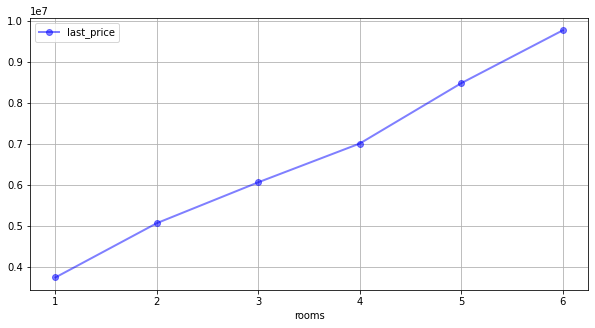

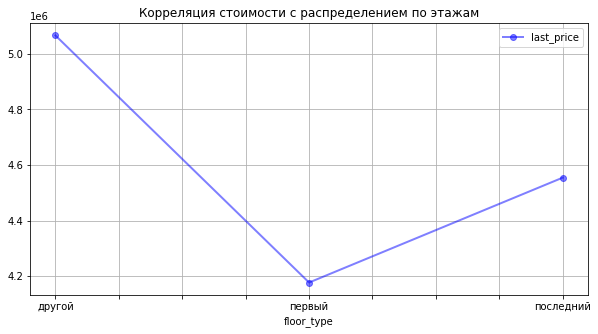

In [39]:
print('Корреляция стоимости с количеством комнат: {:.1%}'.format(data['last_price'].corr(data['rooms'])))
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='blue', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.show()



(
    data.pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='blue', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.title("Корреляция стоимости с распределением по этажам")
plt.show()

Корреляция стоимости с днем недели, месяцем и годом публикации объявления: 


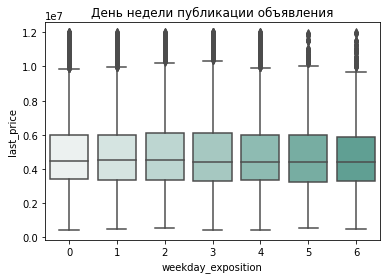

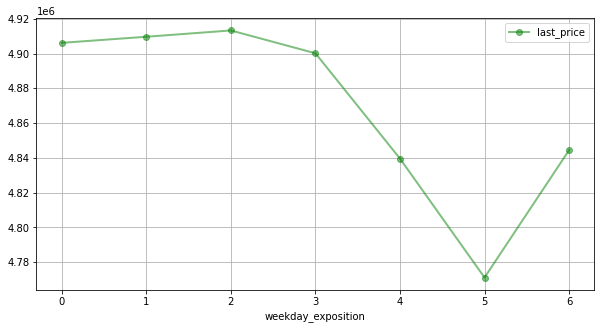

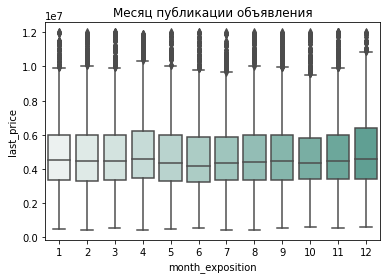

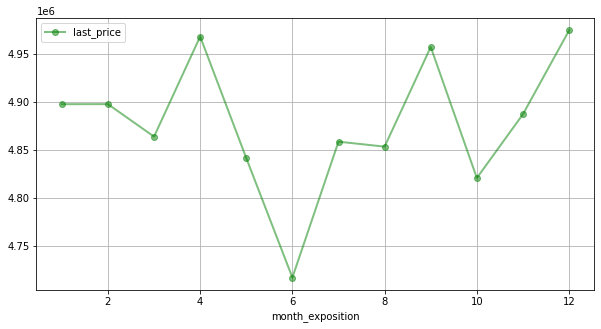

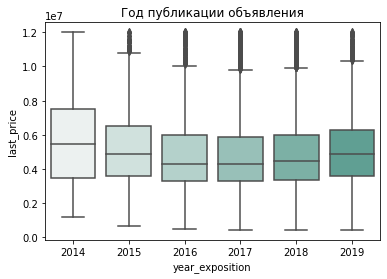

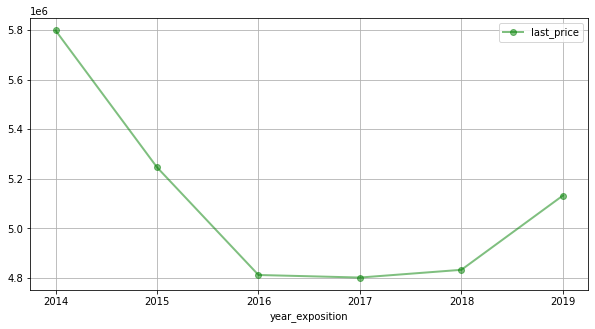

In [40]:
print("Корреляция стоимости с днем недели, месяцем и годом публикации объявления: ")
sns.boxplot(x='weekday_exposition', y='last_price', data=data, palette='light:#5A9')
plt.title("День недели публикации объявления")
plt.show()

(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='green', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.show()

sns.boxplot(x='month_exposition', y='last_price', data=data, palette='light:#5A9')
plt.title("Месяц публикации объявления")
plt.show()

(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='green', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.show()

sns.boxplot(x='year_exposition', y='last_price', data=data, palette='light:#5A9')
plt.title("Год публикации объявления")
plt.show()

(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, 
          style='-o', 
          figsize=(10, 5), 
          color='green', 
          linewidth=2,
          alpha=0.5,
          legend=True)
)
plt.show()

##### Влияние количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год), на общую стоимость недвижимости
1. Корреляция с количеством комнат 46.4%. График восходящий по увеличению количества комнат - чем больше -тем дороже. При этом чаще всего продаются квартиры с 1-2 комнатами, а с более 5 - очень редко. 
2. По этажам чаще всего продают и покупают не первый и не последний этажи - что логично, ведь и вариантов с не первым и не последним этажем в несколько раз больше - т к дома многоэтажные. Можно дополнительно проверить зависимость быстрой продажи с параметром 'другой этаж'
3. По дням недели объявления с самой дорогой недвижимостью были опубликованы по средам (хотя в целом по будням разница не большая), самые недорогие варианты - в субботу
4. По месяцам варианты с самой дорогой недвижимостью были опубликованы в апреле и в декабре. С самой недорогой - в июне. 
5. По годам - всплеск был в 2014г (Валютный кризис в РФ 14-15гг.) Далее до 2016 был спад, и с 2018 небольшой подъем. т е в 2017 г цены на недвижимость были ниже чем в остальных годах выборки (на 18% относительно пикового значения 2014г) 

#### Анализ зависимости стоимости недвижимости от локации
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 



Корреляция стоимости квадратного метра с количеством объявлений: 21.0%



,Количество объявлений,Квадратный метр_руб
locality_name,,
Старополье,1,10368.0
Ям-Тесово,1,12328.0
Выскатка,2,12335.0
Совхозный,1,12555.0
Малая Романовка,1,12724.0
Тёсово-4,1,12931.0
Сижно,1,13709.0
Ефимовский,2,14149.0
Житково,2,14956.0


,Количество объявлений,Квадратный метр_руб
locality_name,,
Санкт-Петербург,12817,101818.0
Зеленогорск,22,98596.0
Пушкин,316,98482.0
Сестрорецк,159,98341.0
Кудрово,420,95985.0
Парголово,301,91642.0
Мистолово,9,90229.0
Стрельна,40,87322.5
Мурино,523,86792.0


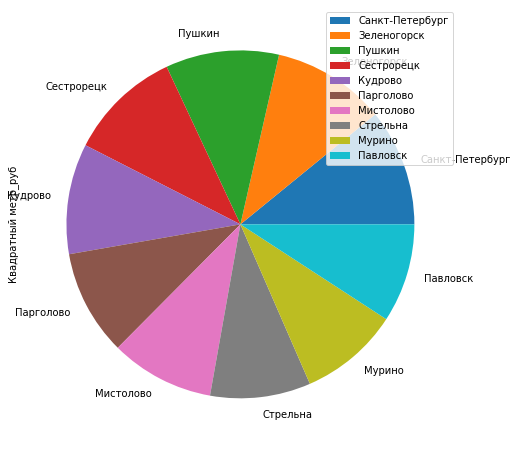

,Количество объявлений,Квадратный метр_руб
locality_name,,
Санкт-Петербург,12817,101818.0
Мурино,523,86792.0
Кудрово,420,95985.0
Шушары,403,77352.0
Всеволожск,370,65789.0
Колпино,326,74689.5
Пушкин,316,98482.0
Парголово,301,91642.0
Гатчина,290,67671.0


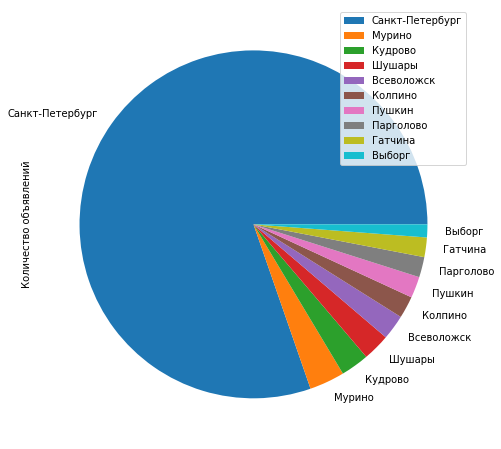

Средняя стоимость квадратного метра ТОП-10 населенных пунктов:  81845 рублей


In [41]:
data_price_top = data.pivot_table(index='locality_name', values='single_square_meter', aggfunc=['count', 'median'])
data_price_top.columns = ['Количество объявлений','Квадратный метр_руб']
print()
print('Корреляция стоимости квадратного метра с количеством объявлений: {:.1%}'
      .format(data_price_top['Квадратный метр_руб'].corr(data_price_top['Количество объявлений'])))
print()
#сначала посмотрим где самая недорогая недвижимость
display(data_price_top.sort_values('Квадратный метр_руб', ascending=True).head(10))
print()
print()
#составим ТОП-10 с самой высокой стоимостью за кв м  
display(data_price_top.sort_values('Квадратный метр_руб', ascending=False).head(10))
data_price_top_1 = data_price_top.sort_values('Квадратный метр_руб', ascending=False).head(10)
data_price_top_1.plot(y = 'Квадратный метр_руб', kind='pie', figsize = (8,8), legend=True)
plt.show()
print()
#составим ТОП-10 с самой высокой стоимостью за кв м 
data_price_top_10 = data_price_top.sort_values('Количество объявлений', ascending=False).head(10)
display(data_price_top_10)
print()
data_price_top_10.plot(y = 'Количество объявлений', kind='pie', figsize = (8,8), legend=True)
plt.show()
print('Средняя стоимость квадратного метра ТОП-10 населенных пунктов: ', round(data_price_top_10['Квадратный метр_руб'].mean()), 'рублей')

1. Средняя стоимость квадратного метра ТОП-10 населенных пунктов:  81845 рублей
2. Самая низкая стоимость недвижимости в деревня Старополье: 10368 рублей/м²
3. Самая дорогая недвижимость и самый большой выбор в г.Санкт-Петербург:  101818 рублей/м², 12817 объявлений.

4. Самая недорогая недвижимость из ТОП-10: Выборг: 58232рублей/м², 192 объявлений.

5. Также хорошие показатели:
  - поселок Мурино: 86792 рублей/м², 523 объявления
  - г.Кудрово: 95985 рублей/м², 420 объявлений
  - г.Пушкин: 98482 рублей/м², 316 объявлений  
  - г.Зеленогорск и г.Сестрорецк отличаются малым количеством объявлений и высокой стоимостью квадратного метра - значит вероятно в этих районах основной процент недвижимости жк элит-класса



#### Анализ зависимости стоимости недвижимости от удаленности от центра города


,SPB,single_square_meter
city_centers_distance,,
0.0,1.000000,124011.555556
1.0,1.000000,120939.556701
2.0,1.000000,112894.476744
3.0,1.000000,108767.856540
4.0,1.000000,113224.046667
5.0,1.000000,120016.397504
6.0,1.000000,120499.755435
7.0,1.000000,116743.638376
8.0,1.000000,114930.781818


<AxesSubplot:xlabel='city_centers_distance'>

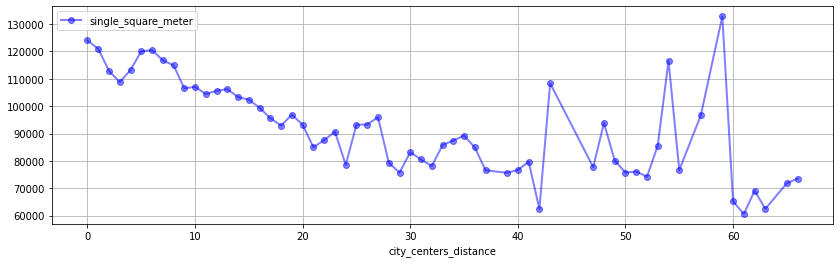

In [42]:
data['SPB']=data['locality_name'] == 'Санкт-Петербург'#выделим группу объявлений по Санкт-Петербургу
#вычислим среднюю стоимость квадратного метра по каждому километру от центра города
data_around_center = data.pivot_table(index='city_centers_distance', values=['single_square_meter', 'SPB'])
display(data_around_center.head(21))

(
    data_around_center.sort_values('city_centers_distance', ascending=True)
    .plot(grid=True, 
          style='-o', 
          y=['single_square_meter'],
          figsize=(14, 4), 
          color='blue',
          linewidth=2,
          alpha=0.5,
          legend=True)
)


##### По графику расчетов стоимости по удаленности от центра города можно сделать вывод:
Центром города можно считать радиус в 8 км - в этом месте заметный скачок стоимости, чем дальше от центра - тем ниже стоимость за квадратный метр жилой недвижимости.
При этом есть исключения - отдельные выбросы в пригороде - но это уже зависит и от картографический показаний, от типа недвижимости (возможно в отдаленных районах есть жк элит-класса), на общую картину это не влияет

### Общий вывод

#### В данном исследовании на этапе предообработки были внесены следущие изменения:
Некорректный тип данных обнаружен в колонках:
- first_day_exposition (дата публикации) - тип object - заменили на datetime
- floors_total (всего этажей в доме) - float64 - заменили на int64
- is_apartment (апартаменты (булев тип)) - object - заменили на bool
- balcony (число балконов) - float64 - заменили на int64
- last_price - (полная стоимость недвижимости) - float64 - заменили на int6 для удобства восприятия

Обнаружены расхождения с хорошим стилем в названиях столбцов, привели все столбцы к единому стилю:
- cityCenters_nearest
- parks_around3000
- ponds_around3000

Выявлены и устранены пропуски в столбцах:

- ceiling_height (39% пропусков) - очень много не заполненых показателей высоты потолков, и еще обнаружена часть внесенных ошибочно данных - 28 м вместо 2.8, данные скорректированы, удалены несколько анамальных значений, пропуски заполнены медианным значением. Рекомендуется передать задачу разработчикам по оптимизации шаблона для ввода данных (сделать ячейку обязательной для ввода, скорректировать формат, например ограничить вввод до 12 м, т к бывают единичные случаи с очень высокими потолками)
- floors_total (0,3% ) и locality_name (0,2%) - незначительные пропуски, удалим, вероятно не вносили этажность на дома с 1 этажем, локация возможно внесена некорректно поэтому при выгрузке не отобразилась
- living_area (8%) - возможно владельцы при внесении данных не знали этот показатель, поэтому не внесли, проверили корреляцию с общей площадью, выявили 94% - сформировали пропуски на основе этих данных со средним значением
- is_apartment (88%) - тип недвижимости "аппартаметы" появился не так давно, возможно многие не знают в чем разница и не заполняют этот параметр, следует обратить внимание разработчикам, скорректировать шаблон, пропуски заполнили значением False
- kitchen_area (9%) - корреляция с общей площадью не показательна - 60%, поэтому заполнили медианным значением
- balcony (48%) - очевидно что просто не заполняют значение если балкона нет - заполнили "0"

Выявлены, но не устранены пропуски в столбцах:
- airports_nearest (23%), city_centers_nearest (23%), parks_around_3000 (23%), parks_nearest (65%), ponds_around_3000 (23%), ponds_nearest (61%)  - картографические данные с ошибкой, при том что locality_name (0,2%) - возможно что данные ошибки из-за некорректных данных названий, в данных были задвоенные названия населенных пунктов - может поэтому картографические данные не смогли корректно выгрузить

- days_exposition (13%) - самое странное отклонение - эти данные должны быть сформированы корректно в любом случае, т к задействован внутренний счетчик - вопрос переадресуем ответственным. Все пропущенные значения можно было бы заменить на медиану, но в таком случае получим искажения по пиковым значениям - пик будет 110 вместо логичных 90 дней (стандартные сроки публикации 45-60-90 дней, чему соответствуют пиковые значения), поэтому заполнять пропуски не будем. Выбросы (значения более 600) при исследовании исключим.


Аномальные значения
- Last_price (12190р) - ошибочное значение - удалено
- total_area (900) - не может быть квартира площадью 900 кв м -удалено
- rooms (0,19) - нулевые - это студии так обозначили, исправили на 1 комнату, выбросы удалили
- ceiling_height (1, 100) - ошибки -удалены
- living_area (2) -  минимум 6,5 м кв - все что меньше -удалено 
- kitchen_area (1.3, 112) - минимум 5 м кв, по СП 54.13330.2011 Здания жилые многоквартир-ные. Актуализированная редакция СНиП 31-01-2003 - все выбросы удалены
- airports_nearest (0) - 0 - невозможно, удалено
- days_exposition (1580) - от 600 дней выбросы - скорректировали при составлении итоговых графиков

В данных осталось 21679 строк, 9% данных были удалены, в основном это были некорректные данные, по ним исследование было бы не правдоподобно

Дубликаты


Были обнаружены дублирующиеся наименования населенных пунктов, преобразовали к единому виду без типов поселений, это допустимо в этом случае, т к работаем с выборкой по одной области, если и будут совпадения по разным типам поселений, то незначительные - на исследовании это значительно не отобразится

Созданы и расчитаны новые показатели для исследования:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

#### При исследовании данных были выявлены следущие зависимости: ####
1. График по жилой площади показывает выраженые 3 пика - возможно это связано с большим спросом на 1 комнатные квартиры и квартиры-студии (у которых не указывают часто площадь кухни, соответственно учитывают в жилую или общую площадь), т к первый пик приходится на область до 21м². Второй пик до 35м², редко более 60м², но эти значения есть и растягиваюся до единичных случаев в 347м²
2. В основном продаются квартиры в 5 и 9 этажных домах, с расположением в основном на "не первом и не последнем" этажах (чаще на 2-3 этажах, что логично - эти этажи есть в любом многоэтажном доме, а значит и вариантов больше всего - соответственно нельзя сказать, что это определяющий фактор ценообразования).
3. Основная масса объктов находится на расстоянии 11-17 км от центра города (видимо спальные районы), в 10-37 км от аэропорта и до 700 метров от ближайшего парка.
4. Чаще всего публикуют объявления в буднии дни (больше всего в четверг), предполагю что это связано во-первых со временем работы риелторов в будни, и тем что зачастую, просмотры устраивают в пятницу-субботу - т к многие потенциальные покупатели работают 5/2 и удобнее смотреть варианты в субботу
5. По месяцам меньше всего объявлений с мая по август - видимо связано с отпусками, и в декабре - январе, что также связано с новогодними праздниками-каникулами
6. Меньше всего объявлений в 2014 году - связано, во-первых, с кризисом (Валютный кризис в РФ 14-15гг.), во-вторых с вероятной непопулярностью сервиса - чаще использовали другие платформы для размещения объявлений, это можно проверить в другом исследовании с доп данными за ранние годы и рекламные компании.
7. Чаще всего жилая недвижимость продается за 45 дней (если считать днем продажи день снятия объявления - этот параметр требует доработки, т к совпадает со сроком размещения объявления). Реже за 60 дней, затем 7 дней, 30 дней, и 90 дней
8. Быстрой можно считать продажу до 30 дней, интересно что два пика приходится на 7 и 30 дней - это сроки публикации объявлений по длительной аренде, возможно есть процент ошибочных объявлений - размещенных в неправильной категории
9. Длительной продажей можно считать от значения 238 дней, необычайно долгой можно считать продажу от 530 дней. Максимальное значение зафиксировано в 1580 дней (более 4 лет)
10. На графиках площадей и стоимости видим распределение по Пуассону, самая большой коэффициент корреляции (62,9%) стоимости с общей площадью - что логично, чем больше площадь недвижимости - тем выше стоимость квартиры.
11. Жилая площадь и площадь кухни влияют в меньшей степени на стоимость - это может быть связано с зависимостью ценообразования от удаленнности от центра, в спальных и новых районах возможно увеличение числа больших квартир за счет строительства новых жк, а кухни, в целом имеют в большинстве площадь до 20 кв м в соответствии со своим назначением, т к у нас нет данных по годам постройки зданий, нет возможности это исследовать
12. Присутствуют единичные аномалии с высокой стоимостью и большой площадью, а также наоборот - с очень низкой стоимостью, возможно это недвижимость в нелеквидном состоянии или в отдаленных локациях
13. Корреляция с количеством комнат 46.4%. График восходящий по увеличению количества комнат - чем больше -тем дороже. При этом чаще всего продаются квартиры с 1-2 комнатами, а с более 5 - очень редко.
14. По этажам чаще всего продают и покупают не первый и не последний этажи - что логично, ведь и вариантов с не первым и не последним этажем в несколько раз больше - т к дома многоэтажные. Можно дополнительно проверить зависимость быстрой продажи с параметром 'другой этаж'
15. По дням недели объявления по самой дорогой недвижимостью , были опубликованы по средам (хотя в целом по будням разница не большая), самые недорогие варианты - в субботу
16. По месяцам варианты с самой дорогой недвижимостью были опубликованы в апреле и в декабре. Ниже всего - в июне.
17. По годам - всплеск был в 2014г (Валютный кризис в РФ 14-15гг.) Далее до 2016 был спад, и с 2018 небольшой подъем. т е в 2017 г цены на недвижимость были ниже чем в остальных годах выборки (на 18% относительно пикового значения 2014г) 
18. Центром города можно считать радиус в 8 км - в этом месте заметный скачок стоимости, чем дальше от центра - тем ниже стоимость за квадратный метр жилой недвижимости. При этом есть исключения - отдельные выбросы в пригороде - но это уже зависит и от картографический показаний, от типа недвижимости (возможно в отдаленных районах есть жк элит-класса), на общую картину это не влияет


### Итоговый вывод

1. В целом, по всем представленным показателям площадей и физических параметров квартир есть отклонения в большие значения, что говорит о наличии небольшого количества элитной недвижимости большой площади с высокими потолками. Основная масса же недвижимости это 1-2 комнатные квартиры, площадью 32-59м², с кухней 6-10м², высотой потолков 2,6 м, стоимостью 2 800 000-5 600 000 рублей

2. Больше всего на стоимость квартиры влияет площадь квартиры и ее месторасположение - чем ближе к центру города Санкт-Петербург - тем дороже, или если это курортный район (например г.Сестрорецк) - стоимость выше, чем в обычных раонах
3. Средняя стоимость квадратного метра ТОП-10 населенных пунктов:  81845 рублей
4. Самая низкая стоимость недвижимости в деревня Старополье: 10368 рублей/м²
5. Самая дорогая недвижимость и самый большой выбор в г.Санкт-Петербург:  101818 рублей/м², 12817 объявлений.
6. Самая недорогая недвижимость из ТОП-10: Выборг: 58232рублей/м², 192 объявлений.

7. Также хорошие показатели:
  - поселок Мурино: 86792 рублей/м², 523 объявления
  - г.Кудрово: 95985 рублей/м², 420 объявлений
  - г.Пушкин: 98482 рублей/м², 316 объявлений  
  - г.Зеленогорск и г.Сестрорецк отличаются малым количеством объявлений и высокой стоимостью квадратного метра - значит, вероятно, в этих районах основной процент недвижимости это ЖК элит-класса

